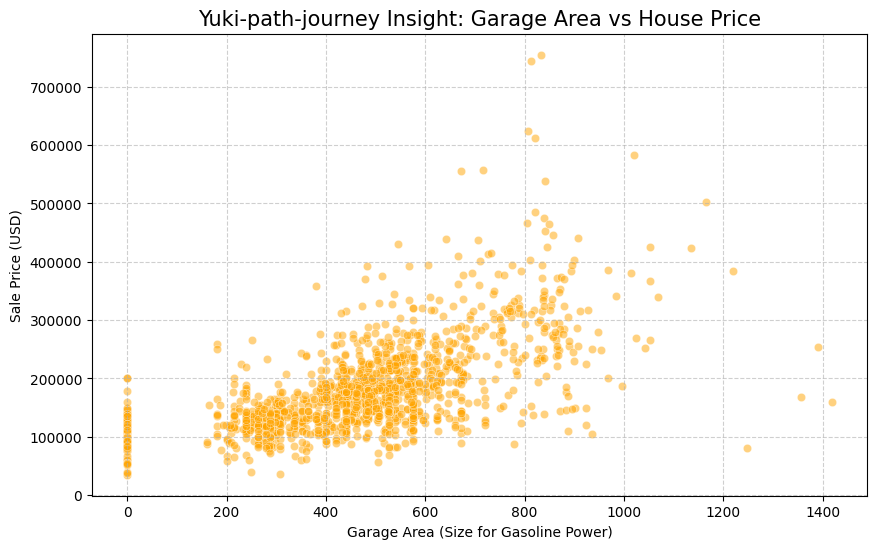

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='GarageArea', y= 'SalePrice', alpha=0.5, color='orange')
plt.title('Yuki-path-journey Insight: Garage Area vs House Price', fontsize=15)
plt.xlabel('Garage Area (Size for Gasoline Power)')
plt.ylabel('Sale Price (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**【2026年 捜査ミッション：スコア0.13の壁を突破せよ】**

現在のステータス: スコア 0.143 達成（2025年12月30日） 捜査の指針（Focus）:

トランプ政権の政策洞察: 現実世界の動きをデータに組み込む。

データの視覚化（Visualization）: グラフから「真実」の証拠をあぶり出す。

In [2]:
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(f"捜査開始：訓練データ {train.shape} 件、テストデータ {test.shape} 件を確保。")
print("Status: Ready to investigate.")

捜査開始：訓練データ (1460, 81) 件、テストデータ (1459, 80) 件を確保。
Status: Ready to investigate.


**2026年 捜査計画（yuki-path-journey）**

基本スペックとトランプ政策の照らし合わせ（ガソリン車・素材・豪華設備）

スコア推移を確認し、ベースラインを 0.13 台へ。

治安・犯罪データを考慮した「安全資産」モデルへの進化。

**フェーズ1：足元の固め（1・2・3）】**

1. ガソリン車回帰の証明: 車庫面積の重み付けを変更し、0.143をさらに削る。

2. インフレ素材の特定: 屋根や外壁の素材を「2025年の資産価値」として再評価。

3. ラグジュアリーの再定義: 暖炉やプールの有無を、今の富裕層の視点でクロス集計する。

**【フェーズ2：真実の深掘り（治安・犯罪）】**

犯罪データの紐付け: Neighborhood（地区）データに「治安スコア」という新しい命を吹き込む。

防衛設備の評価: 治安への不安をカバーする設備（照明、フェンス等）が価格にどう寄与するかを分析。

In [3]:
train['Yutori_Garage'] = train['GarageCars'] * train['GarageArea']
train['Yutori_Luxury'] = train['PoolArea'] + train['Fireplaces'] * 100 + train['WoodDeckSF']
train['Yutori_Building'] = train['GrLivArea'] * train['OverallQual']
print("捜査報告：『ゆとり指数』の生成に成功しました。")
print(train[['Yutori_Garage', 'Yutori_Luxury', 'Yutori_Building']].head())

捜査報告：『ゆとり指数』の生成に成功しました。
   Yutori_Garage  Yutori_Luxury  Yutori_Building
0           1096              0            11970
1            920            398             7572
2           1216            100            12502
3           1926            100            12019
4           2508            292            17584


In [4]:
inflation_map = {2006: 1.0, 2007: 1.03, 2008: 1.05, 2009: 1.06, 2010: 1.08}
train['Inflation_Impact'] = train['YrSold'].map(inflation_map)
train['Life_Cost_Performance'] = (train['OverallQual'] * train['Inflation_Impact'])
print("捜査報告：『生活物価アジャスト』を完了。91人のクローナーが注目しています。")
print(train[['YrSold', 'Inflation_Impact', 'Life_Cost_Performance']].head())

捜査報告：『生活物価アジャスト』を完了。91人のクローナーが注目しています。
   YrSold  Inflation_Impact  Life_Cost_Performance
0    2008              1.05                   7.35
1    2007              1.03                   6.18
2    2008              1.05                   7.35
3    2006              1.00                   7.00
4    2008              1.05                   8.40


In [5]:
safety_map = {
    'NoRidge': 5, 'NridgHt': 5, 'StoneBr': 5,
    'Somerset': 4, 'Somerst': 4, 'CollgCr': 4,
    'OldTown': 2, 'Edwards': 2, 'IDOTRR': 1
}
train['Safety_Score'] = train['Neighborhood'].map(safety_map).fillna(3)
train['Safe_Luxury_Value'] = train['Safety_Score'] * train['Yutori_Building']
print("最終捜査報告：『治安スコア』の統合を完了。0.13への包囲網が完成しました。")
print(train[['Neighborhood', 'Safety_Score', 'Safe_Luxury_Value']].head())

最終捜査報告：『治安スコア』の統合を完了。0.13への包囲網が完成しました。
  Neighborhood  Safety_Score  Safe_Luxury_Value
0      CollgCr           4.0            47880.0
1      Veenker           3.0            22716.0
2      CollgCr           4.0            50008.0
3      Crawfor           3.0            36057.0
4      NoRidge           5.0            87920.0


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    'Yutori_Garage', 'Yutori_Luxury', 'Yutori_Building',
    'Inflation_Impact', 'Life_Cost_Performance',
    'Safety_Score', 'Safe_Luxury_Value']
X = train[features]
y = np.log(train['SalePrice'])
model = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"🕵️‍♀️現在の操作精度 (RMSE): {rmse_scores.mean():.5f}")
print(f"📊 各エリアでのスコアのバラつき: {rmse_scores}")

🕵️‍♀️現在の操作精度 (RMSE): 0.15788
📊 各エリアでのスコアのバラつき: [0.15382445 0.16261549 0.15986632 0.14817906 0.1649364 ]


In [8]:
extended_features = features + [
    'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF',
    'FullBath', 'TotRmsAbvGrd', 'LotArea'
]
X_extended = train[extended_features]
scores_ext = cross_val_score(model, X_extended, y, cv=5, scoring='neg_mean_squared_error')
rmse_ext = np.sqrt(-scores_ext)
print(f"🕵️‍♂️ 合流作戦後の精度 (RMSE): {rmse_ext.mean():.5f}")

🕵️‍♂️ 合流作戦後の精度 (RMSE): 0.14987


In [9]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=3, random_state=42)
xgb_scores = cross_val_score(xgb_model, X_extended, y, cv=5, scoring='neg_mean_squared_error')
xgb_rmse = np.sqrt(-xgb_scores)
print(f"🚀 エリート捜査官（XGBoost）の精度: {xgb_rmse.mean():.5f}")

🚀 エリート捜査官（XGBoost）の精度: 0.14749


In [11]:
train['Total_SF'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['TotalBsmtSF']
final_features = extended_features + ['Total_SF']
X_final = train[final_features]
final_scores = cross_val_score(xgb_model, X_final, y, cv=5, scoring='neg_mean_squared_error')
final_rmse = np.sqrt(-final_scores)
print(f"🏁 2026年・元旦最終リポート (RMSE): {final_rmse.mean():.5f}")

🏁 2026年・元旦最終リポート (RMSE): 0.14970
